In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.0f}'.format

## 버스승하차 데이터, 미세먼지 농도 데이터 불러오기

In [4]:
dust_df_GJ = pd.read_csv('dust_df_GJ.csv')
bususer_GJ = pd.read_csv('bususer_GwangJin.csv')

In [5]:
bususer_GJ.sample(5)

,Unnamed: 0,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,행정동,역명
97,97,202202,104000008,5101,377,246,92,65,51,63,...,587,623,937,786,641,682,558,394,중곡1동,군자교
1555,1555,202208,104000155,5248,0,0,0,0,294,511,...,1127,1197,1272,1009,831,638,493,227,군자동,장안초등학교
83,83,202212,104000006,5006,988,290,137,75,1332,1969,...,7141,7415,8789,6237,5418,4709,4392,2309,구의2동,어린이대공원후문아차산역
440,440,202209,104000038,5131,75,0,0,0,224,525,...,1234,1209,1261,1159,816,640,594,303,중곡3동,용암사입구
1472,1472,202209,104000148,5241,1,0,0,0,101,186,...,578,561,509,439,249,258,183,75,군자동,군자삼거리


In [6]:
dust_df_GJ = dust_df_GJ.iloc[:,3:]

In [7]:
bususer_GJ = bususer_GJ.iloc[:,1:]

In [8]:
dust_df_GJ.iloc[:,3:].sample(5)

,초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),date,month,day,hour,행정동
6325,24,35,2022-01-21 23:00:00,1,21,23,Guui1-dong
51642,14,18,2022-07-03 14:00:00,7,3,14,Guui3-dong
45005,9,9,2022-06-11 18:00:00,6,11,18,Jayang3-dong
55441,18,23,2022-07-15 23:00:00,7,15,23,Guui2-dong
100891,24,28,2022-12-26 05:00:00,12,26,5,Hwayang-dong


In [9]:
dust_df_GJ['미세먼지 보정(㎍/㎥)'].mean()

19.201933753230293

In [10]:
#사용년월 형식 변경
bususer_GJ['사용년월'] = bususer_GJ['사용년월']%202200

In [11]:
bususer_GJ

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,역명
0,1,101000252,5118,140,0,0,0,418,966,1666,...,2493,2920,2617,2103,1503,1514,713,363,중곡2동,신성시장앞
1,2,101000252,5118,81,0,0,0,380,929,1520,...,2302,2415,2501,1937,1307,1197,729,271,중곡2동,신성시장앞
2,3,101000252,5118,163,0,0,0,481,1017,1944,...,2594,2782,2823,2232,1504,1164,863,406,중곡2동,신성시장앞
3,4,101000252,5118,220,0,0,0,459,989,2099,...,2709,2942,2868,2358,1613,1259,891,408,중곡2동,신성시장앞
4,5,101000252,5118,221,0,0,0,477,1051,2200,...,2877,3103,3261,2327,1859,1351,930,413,중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,8,104900129,5999,0,0,0,0,0,0,1710,...,3057,4067,5479,3945,2880,2198,2003,787,구의3동,강변역.테크노마트앞
3224,9,104900129,5999,0,0,0,0,0,0,1768,...,3067,4046,5505,3756,2931,2314,2121,721,구의3동,강변역.테크노마트앞
3225,10,104900129,5999,0,0,0,0,0,0,1673,...,3191,4049,5726,4008,3136,2346,2175,782,구의3동,강변역.테크노마트앞
3226,11,104900129,5999,0,0,0,0,0,0,1634,...,3112,4182,5907,4092,2875,2363,1981,756,구의3동,강변역.테크노마트앞


## groupby 데이터프레임 만들기

In [12]:
# 자양2동은 오류데이터가 많으므로 지리적으로 가까운 자양3동의 데이터로 대체
guui1 = dust_df_GJ[dust_df_GJ['행정동']=='Guui1-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
guui2 = dust_df_GJ[dust_df_GJ['행정동']=='Guui2-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
guui3 = dust_df_GJ[dust_df_GJ['행정동']=='Guui3-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
jayang1 = dust_df_GJ[dust_df_GJ['행정동']=='Jayang1-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
jayang2 = dust_df_GJ[dust_df_GJ['행정동']=='Jayang3-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
jayang3 = dust_df_GJ[dust_df_GJ['행정동']=='Jayang3-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
jayang4 = dust_df_GJ[dust_df_GJ['행정동']=='Jayang4-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
junggok1 = dust_df_GJ[dust_df_GJ['행정동']=='Junggok1-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
junggok2 = dust_df_GJ[dust_df_GJ['행정동']=='Junggok2-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
junggok3 = dust_df_GJ[dust_df_GJ['행정동']=='Junggok3-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
junggok4 = dust_df_GJ[dust_df_GJ['행정동']=='Junggok4-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
neung = dust_df_GJ[dust_df_GJ['행정동']=='Neung-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
gunja = dust_df_GJ[dust_df_GJ['행정동']=='Gunja-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
hwayang = dust_df_GJ[dust_df_GJ['행정동']=='Hwayang-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()
gwangjang = dust_df_GJ[dust_df_GJ['행정동']=='Gwangjang-dong'][['초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'month', 'hour']].groupby(['month', 'hour']).mean().reset_index()

In [13]:
dong_list = []
dong_list.extend([guui1, guui2, guui3, jayang1, jayang2, jayang3, jayang4, junggok1, junggok2, junggok3, junggok4, neung, gunja, hwayang, gwangjang])

In [14]:
dong_dict = {'구의1동':0, '구의2동':1, '구의3동':2, '자양1동':3, '자양2동':4, '자양3동':5, 
             '자양4동':6, '중곡1동':7, '중곡2동':8, '중곡3동':9, '중곡4동':10, '능동':11, 
             '군자동':12, '화양동':13, '광장동':14}

In [15]:
junggok1[junggok1['month'] == 12]

,month,hour,초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥)
264,12,0,15,18
265,12,1,7,9
266,12,2,6,6
267,12,4,15,18
268,12,5,17,20
269,12,6,19,24
270,12,7,16,18
271,12,8,17,20
272,12,9,16,20
273,12,10,18,22


## 버스승하차 수와 미세먼지 농도 곱하기

In [16]:
bus_dust10 = bususer_GJ.copy()

In [17]:
for j in range(24):
    hour = []
    for i, dong in enumerate(bus_dust10['행정동']):
        temp_bus = bususer_GJ.iloc[:,[0,3+j]]
        temp_dust = dong_list[dong_dict[dong]]
        bus = temp_bus.iloc[i,1]
        temp1 = temp_dust[temp_dust['month'] == temp_bus.iloc[i,0]]
        temp2 = temp1[temp1['hour'] == j]
        
        if temp2.shape[0] == 0:
            dust=0
            print(dong)
            print(temp_bus.iloc[i,0])
        else:
            dust=temp2.iloc[0,3]
        hour.append(bus*dust)
    bus_dust10[str(j)] = hour
    print(j)

0
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
1
2
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡3동
12
중곡1동
12
중곡1동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡1동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡1동
12
중곡3동
12
중곡1동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡1동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡1동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡1동
12
중곡3동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡3동
12
중곡3동
12
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [18]:
bus_dust10_1 = bus_dust10.copy()
bus_dust10_1.iloc[:,3:27]  = bus_dust10.iloc[:,3:27]/dust_df_GJ['미세먼지 보정(㎍/㎥)'].mean()
bus_dust10_1.drop(['7','8','9','10','11', '12', '13', '14', '15'], axis=1).sample(5)

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,16,17,18,19,20,21,22,23,행정동,역명
2784,1,104900076,5723,0,0,0,0,0,0,62,666,660,737,934,617,831,551,209,중곡4동,해오름공원입구
187,8,104000015,5108,0,0,0,0,40,45,101,159,177,123,159,79,70,69,44,중곡1동,중곡1동사거리
2515,8,104900050,5528,0,0,0,0,0,0,162,205,146,103,80,46,28,46,11,광장동,광남고.삼성아파트
2790,7,104900076,5723,0,0,0,0,0,0,109,466,460,548,560,330,360,351,287,중곡4동,해오름공원입구
2100,1,104900016,5589,0,0,0,0,0,0,201,924,777,"1,186",966,609,797,609,362,자양2동,행운슈퍼앞


In [19]:
bus_dust10.to_csv('bus_dust10.csv')

## 버스승하차 수와 초미세먼지 농도 곱하기

In [20]:
bus_dust2_5 = bususer_GJ.copy()

In [21]:
#자양1동 -> 6월의 3시데이터 누락, 중곡1~4동 12월의 3시데이터 누락
for j in range(24):
    hour = []
    for i, dong in enumerate(bus_dust2_5['행정동']):
        temp_bus = bususer_GJ.iloc[:,[0,3+j]]
        temp_dust = dong_list[dong_dict[dong]]
        bus = temp_bus.iloc[i,1]
        temp1 = temp_dust[temp_dust['month'] == temp_bus.iloc[i,0]]
        temp2 = temp1[temp1['hour'] == j]
        
        if temp2.shape[0] == 0:
            dust=0
            print(dong)
            print(temp_bus.iloc[i,0])
        else:
            dust=temp2.iloc[0,2]
        hour.append(bus*dust)
    bus_dust2_5[str(j)] = hour
    print(j)

0
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
자양1동
12
1
2
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡1동
12
중곡3동
12
중곡1동
12
중곡1동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡1동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡1동
12
중곡3동
12
중곡1동
12
중곡3동
12
중곡3동
12
중곡3동
12
중곡1동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡1동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡1동
12
중곡3동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡4동
12
중곡3동
12
중곡3동
12
3
4
5
6
7


In [ ]:
bus_dust2_5

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,역명
0,1,101000252,5118,"3,944",0,0,0,"11,023","28,014","49,520",...,"73,243","81,659","76,254","59,609","41,410","42,444","20,603","9,849",중곡2동,신성시장앞
1,2,101000252,5118,"2,703",0,0,0,"11,004","28,242","45,375",...,"69,060","70,572","76,512","59,904","40,178","36,353","23,193","9,068",중곡2동,신성시장앞
2,3,101000252,5118,"3,681",0,0,0,"11,338","22,247","45,360",...,"56,243","52,605","62,491","49,755","32,211","24,723","18,744","8,492",중곡2동,신성시장앞
3,4,101000252,5118,"5,430",0,0,0,"11,256","23,607","55,624",...,"49,255","49,247","50,751","44,905","37,906","28,353","20,733","10,331",중곡2동,신성시장앞
4,5,101000252,5118,"2,351",0,0,0,"5,432","11,010","25,562",...,"26,416","25,811","26,384","21,789","21,224","13,381","9,138","3,999",중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,8,104900129,5999,0,0,0,0,0,0,"10,589",...,"22,800","29,445","35,285","30,715","18,086","14,331","14,714","5,101",구의3동,강변역.테크노마트앞
3224,9,104900129,5999,0,0,0,0,0,0,"11,197",...,"22,315","30,136","38,725","32,552","25,597","18,898","17,746","6,153",구의3동,강변역.테크노마트앞
3225,10,104900129,5999,0,0,0,0,0,0,"16,298",...,"34,483","42,710","70,005","50,100","37,005","28,757","28,205","9,611",구의3동,강변역.테크노마트앞
3226,11,104900129,5999,0,0,0,0,0,0,"30,937",...,"58,795","71,393","108,014","82,263","55,121","45,304","39,825","14,025",구의3동,강변역.테크노마트앞


In [ ]:
bus_dust2_5.to_csv('bus_dust2_5.csv')

## 승하차수와 (초)미세먼지 농도를 곱한 승하차수 데이터 비교하기

In [ ]:
bus_table = pd.read_csv('busdata.csv')
bus_table = bus_table.loc[:,['표준버스정류장ID','역명']]
bus_table

,표준버스정류장ID,역명
0,101000252,신성시장앞
1,104000001,군자교입구
2,104000002,군자교입구
3,104000003,군자역.용마초등학교
4,104000004,군자역.용마초등학교
...,...,...
264,104900125,중곡119안전센터
265,104900126,광장자이아파트
266,104900127,광장자이아파트
267,104900128,중곡아파트.기점


In [ ]:
bususer_GJ['시간합'] = bususer_GJ.iloc[:,3:27].sum(axis=1)
bususer_GJ
bususer_GJ_rank = bususer_GJ[['표준버스정류장ID', '시간합']].groupby(['표준버스정류장ID']).mean().reset_index()
bususer_GJ_rank = pd.merge(bususer_GJ_rank, bus_table, how='outer')
bususer_GJ_rank = pd.merge(bususer_GJ_rank, bususer_GJ.loc[:,['표준버스정류장ID', '행정동']].drop_duplicates(), how='outer')
bususer_GJ_rank = bususer_GJ_rank.sort_values(by='시간합', ascending = False)

In [ ]:
bus_dust2_5['시간합'] = bus_dust2_5.iloc[:,3:27].sum(axis=1)
bus_dust2_5
bus_dust2_5_rank = bus_dust2_5[['표준버스정류장ID', '시간합']].groupby(['표준버스정류장ID']).mean().reset_index()
bus_dust2_5_rank = pd.merge(bus_dust2_5_rank, bus_table, how='outer')
bus_dust2_5_rank = pd.merge(bus_dust2_5_rank,bususer_GJ.loc[:,['표준버스정류장ID', '행정동']].drop_duplicates(), how='outer')
bus_dust2_5_rank = bus_dust2_5_rank.sort_values(by='시간합', ascending = False)

In [ ]:
bus_dust10['시간합'] = bus_dust10.iloc[:,3:27].sum(axis=1)
bus_dust10
bus_dust10_rank = bus_dust10[['표준버스정류장ID', '시간합']].groupby(['표준버스정류장ID']).mean().reset_index()
bus_dust10_rank = pd.merge(bus_dust10_rank, bus_table, how='outer')
bus_dust10_rank = pd.merge(bus_dust10_rank, bususer_GJ.loc[:,['표준버스정류장ID', '행정동']].drop_duplicates(), how='outer')
bus_dust10_rank = bus_dust10_rank.sort_values(by='시간합', ascending = False)

In [ ]:
bususer_GJ_rank.head(10)

,표준버스정류장ID,시간합,역명,행정동
114,104000139,"147,535",건대입구역사거리.건대병원,화양동
7,104000007,"146,950",어린이대공원후문아차산역,능동
100,104000125,"115,582",건대로데오거리입구,자양4동
6,104000006,"102,907",어린이대공원후문아차산역,구의2동
4,104000004,"101,131",군자역.용마초등학교,능동
53,104000055,"95,684",광진구청,구의1동
89,104000111,"92,268",광진문화예술회관,자양3동
69,104000082,"87,388",광진구청,자양1동
1,104000001,"83,257",군자교입구,중곡1동
3,104000003,"79,825",군자역.용마초등학교,중곡2동


In [ ]:
bus_dust2_5_rank.head(10)

,표준버스정류장ID,시간합,역명,행정동
89,104000111,"1,748,432",광진문화예술회관,자양3동
53,104000055,"1,733,421",광진구청,구의1동
7,104000007,"1,675,926",어린이대공원후문아차산역,능동
114,104000139,"1,539,026",건대입구역사거리.건대병원,화양동
50,104000052,"1,401,641",광진경찰서,구의1동
6,104000006,"1,352,889",어린이대공원후문아차산역,구의2동
3,104000003,"1,323,399",군자역.용마초등학교,중곡2동
100,104000125,"1,320,687",건대로데오거리입구,자양4동
2,104000002,"1,311,136",군자교입구,군자동
69,104000082,"1,264,530",광진구청,자양1동


In [ ]:
bus_dust10_rank.head(10)

,표준버스정류장ID,시간합,역명,행정동
53,104000055,"2,809,866",광진구청,구의1동
114,104000139,"2,560,465",건대입구역사거리.건대병원,화양동
89,104000111,"2,273,131",광진문화예술회관,자양3동
50,104000052,"2,261,989",광진경찰서,구의1동
7,104000007,"1,985,874",어린이대공원후문아차산역,능동
6,104000006,"1,742,298",어린이대공원후문아차산역,구의2동
2,104000002,"1,670,410",군자교입구,군자동
69,104000082,"1,627,444",광진구청,자양1동
3,104000003,"1,624,308",군자역.용마초등학교,중곡2동
133,104000160,"1,583,756",능동사거리.군자역,군자동


## 미세먼지x인구밀집도 와 초미세먼지x인구밀집도 단순합

In [ ]:
bus_dust = bus_dust10.loc[:,['시간합']]+bus_dust2_5.loc[:,['시간합']]
bus_dust['표준버스정류장ID'] = bususer_GJ['표준버스정류장ID']

In [ ]:
bus_dust_rank = bus_dust[['표준버스정류장ID', '시간합']].groupby(['표준버스정류장ID']).mean().reset_index()
bus_dust_rank = pd.merge(bus_dust_rank,bus_table, how='outer')
bus_dust_rank = pd.merge(bus_dust_rank,bususer_GJ.loc[:,['표준버스정류장ID', '행정동']].drop_duplicates(), how='outer')
bus_dust_rank = bus_dust_rank.sort_values(by='시간합', ascending = False)

In [ ]:
bus_dust_rank.head(10)

,표준버스정류장ID,시간합,역명,행정동
53,104000055,"4,543,287",광진구청,구의1동
114,104000139,"4,099,491",건대입구역사거리.건대병원,화양동
89,104000111,"4,021,563",광진문화예술회관,자양3동
50,104000052,"3,663,630",광진경찰서,구의1동
7,104000007,"3,661,800",어린이대공원후문아차산역,능동
6,104000006,"3,095,187",어린이대공원후문아차산역,구의2동
2,104000002,"2,981,546",군자교입구,군자동
3,104000003,"2,947,707",군자역.용마초등학교,중곡2동
100,104000125,"2,896,831",건대로데오거리입구,자양4동
69,104000082,"2,891,974",광진구청,자양1동


In [ ]:
bususer_GJ_rank.head(10)

,표준버스정류장ID,시간합,역명,행정동
114,104000139,"147,535",건대입구역사거리.건대병원,화양동
7,104000007,"146,950",어린이대공원후문아차산역,능동
100,104000125,"115,582",건대로데오거리입구,자양4동
6,104000006,"102,907",어린이대공원후문아차산역,구의2동
4,104000004,"101,131",군자역.용마초등학교,능동
53,104000055,"95,684",광진구청,구의1동
89,104000111,"92,268",광진문화예술회관,자양3동
69,104000082,"87,388",광진구청,자양1동
1,104000001,"83,257",군자교입구,중곡1동
3,104000003,"79,825",군자역.용마초등학교,중곡2동


In [ ]:
bus_dust_rank.head(10)

,표준버스정류장ID,시간합,역명,행정동
53,104000055,"4,543,287",광진구청,구의1동
114,104000139,"4,099,491",건대입구역사거리.건대병원,화양동
89,104000111,"4,021,563",광진문화예술회관,자양3동
50,104000052,"3,663,630",광진경찰서,구의1동
7,104000007,"3,661,800",어린이대공원후문아차산역,능동
6,104000006,"3,095,187",어린이대공원후문아차산역,구의2동
2,104000002,"2,981,546",군자교입구,군자동
3,104000003,"2,947,707",군자역.용마초등학교,중곡2동
100,104000125,"2,896,831",건대로데오거리입구,자양4동
69,104000082,"2,891,974",광진구청,자양1동


In [ ]:
bususer_GJ_rank = pd.merge(bususer_GJ_rank, bususer_GJ.loc[:,['표준버스정류장ID', '행정동']].drop_duplicates(), how='outer')

In [ ]:
bususer_GJ_rank

,표준버스정류장ID,시간합,역명,행정동
0,104000139,"147,535",건대입구역사거리.건대병원,화양동
1,104000007,"146,950",어린이대공원후문아차산역,능동
2,104000125,"115,582",건대로데오거리입구,자양4동
3,104000006,"102,907",어린이대공원후문아차산역,구의2동
4,104000004,"101,131",군자역.용마초등학교,능동
...,...,...,...,...
264,104900057,800,한강호텔입구,광장동
265,104000275,64,중곡동성당,중곡1동
266,104000274,32,종합의료복합단지,중곡3동
267,104000272,29,용곡삼거리,중곡3동


In [ ]:
bususer_GJ[bususer_GJ['표준버스정류장ID'] == 104000002]

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,17,18,19,20,21,22,23,행정동,역명,시간합
24,1,104000002,5002,704,157,73,35,115,2043,2044,...,5664,7224,4794,3165,4063,2341,1103,군자동,군자교입구,70740
25,2,104000002,5002,565,136,70,29,97,1916,1800,...,4864,5932,4160,2761,3093,2293,1144,군자동,군자교입구,61197
26,3,104000002,5002,910,202,116,47,179,2567,1965,...,5631,6847,4672,2935,2693,2758,1914,군자동,군자교입구,70553
27,4,104000002,5002,1469,348,201,104,203,2709,2096,...,5990,7267,5356,3402,2993,3040,1962,군자동,군자교입구,77085
28,5,104000002,5002,1486,532,241,147,237,2777,2251,...,6095,7706,5583,3734,3404,3274,2325,군자동,군자교입구,82026
29,6,104000002,5002,1106,517,218,82,204,2438,2114,...,6103,7486,5565,3563,3300,3081,2157,군자동,군자교입구,78177
30,7,104000002,5002,1029,290,220,71,187,2648,2168,...,5891,7852,5529,3624,3474,3062,2005,군자동,군자교입구,79318
31,8,104000002,5002,948,206,154,62,197,2660,2131,...,5799,7459,5548,3352,3183,3009,1948,군자동,군자교입구,76881
32,9,104000002,5002,958,259,183,99,147,2445,2095,...,5948,7314,5604,3609,3224,3145,1946,군자동,군자교입구,78694
33,10,104000002,5002,1101,314,237,107,171,2636,2303,...,6215,7441,5344,3688,3447,3168,2151,군자동,군자교입구,82287


In [ ]:
bus_dust_top50 = bus_dust_rank.head(50)

In [ ]:
bus_dust_top50.to_csv('bus_dust_top50.csv')

In [ ]:
new4_2 = bus_dust10.copy()

new4_2.loc['시간 별 평균 이용자 수',:]= new4_2.loc[:,'0':'23'].mean(axis=0)

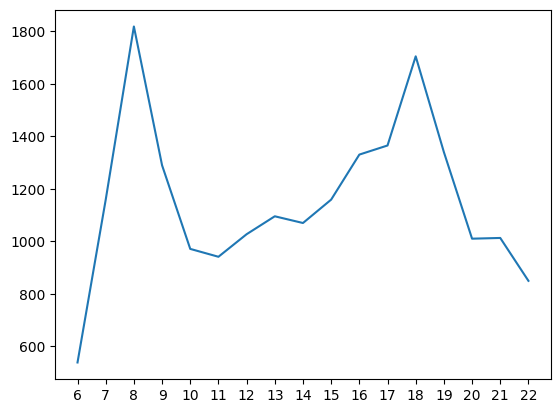

In [ ]:
temp_2 = new4_2.iloc[new4_2.shape[0]-1,9:26]

temp_2 = temp_2/dust_df_GJ['미세먼지 보정(㎍/㎥)'].mean()

plt.plot(temp_2)

In [ ]:
dust_df_GJ['미세먼지 보정(㎍/㎥)'].mean()

19.669715979254136

In [ ]:
new4_3 = bususer_GJ.copy()

In [ ]:
new4_3.loc['시간 별 평균 이용자 수',:]= new4_3.loc[:,'0':'23'].mean(axis=0)

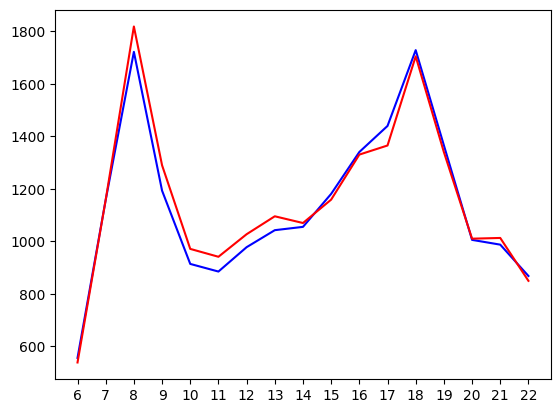

In [ ]:
temp_3 = new4_3.iloc[new4_2.shape[0]-1,9:26]

plt.plot(temp_3, c = 'blue')
plt.plot(temp_2, c = 'red')

## 광진구 버스 미세먼지 데이터

In [ ]:
bus_dust10= pd.read_csv("./bus_dust10.csv")
bus_dust10

In [ ]:
bus_dust10.drop(['Unnamed: 0'], axis=1, inplace = True)
bus_dust10

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,역명
0,1,101000252,5118,4760.000000,0.0,0.0,0.0,13112.814815,33010.551724,58424.896552,...,90607.655172,99783.448276,93399.827586,70849.344828,50635.551724,51476.000000,24537.034483,11954.800000,중곡2동,신성시장앞
1,2,101000252,5118,3333.000000,0.0,0.0,0.0,13474.166667,34930.400000,56014.814815,...,86026.592593,87655.555556,94389.592593,73677.740741,49181.925926,44555.000000,28620.000000,11152.692308,중곡2동,신성시장앞
2,3,101000252,5118,4557.208333,0.0,0.0,0.0,13788.666667,27459.000000,55323.000000,...,80414.000000,73343.636364,82123.636364,63519.000000,41986.666667,32079.840000,23370.040000,10843.583333,중곡2동,신성시장앞
3,4,101000252,5118,6969.600000,0.0,0.0,0.0,14535.000000,31046.000000,70235.769231,...,68463.818182,67282.260870,71700.000000,62333.217391,50809.500000,38323.960000,27997.961538,13300.800000,중곡2동,신성시장앞
4,5,101000252,5118,3013.636364,0.0,0.0,0.0,6810.500000,13713.047619,30485.714286,...,34393.227273,32440.454545,30831.272727,26231.636364,24321.916667,17048.333333,11362.173913,5162.500000,중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,8,104900129,5999,0.000000,0.0,0.0,0.0,0.000000,0.000000,12627.692308,...,27258.250000,36440.320000,40325.440000,34377.857143,22003.200000,17408.160000,17102.538462,6587.481481,구의3동,강변역.테크노마트앞
3224,9,104900129,5999,0.000000,0.0,0.0,0.0,0.000000,0.000000,12493.866667,...,26122.379310,36414.000000,46507.758621,36182.800000,31264.000000,22060.133333,20361.600000,7161.933333,구의3동,강변역.테크노마트앞
3225,10,104900129,5999,0.000000,0.0,0.0,0.0,0.000000,0.000000,19374.419355,...,45394.548387,53943.129032,85520.580645,60253.600000,45367.466667,35795.419355,33045.967742,11629.096774,구의3동,강변역.테크노마트앞
3226,11,104900129,5999,0.000000,0.0,0.0,0.0,0.000000,0.000000,37037.333333,...,75466.000000,93049.500000,143033.785714,101453.379310,70487.068966,55897.172414,48568.655172,17518.344828,구의3동,강변역.테크노마트앞


In [ ]:
new2_2 = bus_dust10.copy()
new2_2

new2_2.loc[:,'일일 총 이용객 수'] =  new2_2.loc[:,'0':'23'].sum(axis=1)
new2_2

new2_2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2_2

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,17,18,19,20,21,22,23,행정동,역명,일일 총 이용객 수
1371,4,104000139,5232,221717.760000,62678.000000,24050.000000,18300.571429,19960.363636,57236.041667,59120.480000,...,363560.217391,428760.000000,441591.428571,418653.000000,376912.826087,427350.000000,327109.600000,화양동,건대입구역사거리.건대병원,5.398035e+06
1368,1,104000139,5232,25768.931034,10422.363636,7386.272727,5695.000000,8825.666667,37009.655172,44571.034483,...,397625.068966,557682.517241,450260.793103,428318.172414,646345.068966,282160.551724,91556.333333,화양동,건대입구역사거리.건대병원,5.223089e+06
1374,7,104000139,5232,80724.774194,37932.941176,25176.200000,12513.933333,17207.142857,41314.838710,40152.724138,...,457267.166667,580249.310345,480096.896552,367555.354839,386418.741935,362896.724138,239904.677419,화양동,건대입구역사거리.건대병원,5.219893e+06
1370,3,104000139,5232,80630.608696,18564.000000,5382.000000,5782.636364,8217.521739,33352.375000,35520.000000,...,373166.181818,517909.090909,391090.583333,313549.041667,293112.000000,316506.000000,231467.120000,화양동,건대입구역사거리.건대병원,4.629010e+06
84,1,104000007,5007,26518.896552,3974.857143,1863.000000,1397.000000,23970.230769,93294.827586,144416.000000,...,295572.379310,355549.517241,270131.896552,189842.896552,214350.896552,133869.827586,58548.966667,능동,어린이대공원후문아차산역,4.342141e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,9,104000136,5229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,화양동,건대입구역사거리.건대병원,0.000000e+00
1797,10,104000290,5233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,화양동,어린이회관,0.000000e+00
1798,11,104000290,5233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,화양동,어린이회관,0.000000e+00
2255,12,104900028,5561,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,화양동,화양동현대아파트,0.000000e+00


In [ ]:
new2

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,일일 총 이용객 수
3073,202212,104000139,5232,3344,1491,1169,876,822,1971,2216,...,13460,14737,18176,15118,12500,12708,12993,8172,화양동,180450
1083,202205,104000007,5007,1955,651,113,122,1109,4071,5301,...,11197,12012,12806,10116,7506,6718,5659,3262,능동,166353
2804,202211,104000139,5232,2936,1480,756,702,698,1537,1958,...,10747,12722,16717,13672,11399,11243,11621,6833,화양동,161782
1997,202208,104000139,5232,2967,1478,622,588,660,1611,1956,...,10581,12872,16449,13699,10970,11084,11544,7359,화양동,161408
1728,202207,104000139,5232,3132,1697,734,557,730,1642,1647,...,10664,12905,16465,13465,10914,11333,11785,7755,화양동,160330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,202203,104000272,5271,6,2,5,1,0,0,0,...,0,0,0,0,0,0,0,2,중곡3동,16
413,202202,104000272,5271,6,6,2,0,0,0,0,...,0,0,0,0,0,0,0,2,중곡3동,16
415,202202,104000274,5269,7,2,4,1,0,0,0,...,0,0,0,0,0,0,0,1,중곡3동,15
414,202202,104000273,5270,3,3,4,1,0,0,0,...,0,0,0,0,0,0,0,1,중곡3동,12


In [ ]:
new2_2 = new2_2.groupby(['표준버스정류장ID']).agg({'일일 총 이용객 수':'mean'})


In [ ]:
new2_2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2_2

,일일 총 이용객 수
표준버스정류장ID,
104000055,2.809866e+06
104000139,2.560465e+06
104000111,2.273131e+06
104000052,2.261989e+06
104000007,1.985874e+06
...,...
104900057,1.583748e+04
104000275,7.708310e+02
104000272,7.264789e+02


In [ ]:
new2 = new2.groupby(['표준버스정류장ID']).agg({'일일 총 이용객 수':'mean'})


In [ ]:
new2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2

,일일 총 이용객 수
표준버스정류장ID,
104000139,147535.166667
104000007,146950.166667
104000125,115582.500000
104000006,102907.333333
104000004,101130.833333
...,...
104900057,800.166667
104000275,64.500000
104000274,31.666667


In [ ]:
bus_table = bus_GJ.loc[:,['표준버스정류장ID', '역명']]
bus_table = bus_table.drop_duplicates()
bus_table

In [ ]:
bus_table.to_csv('./busdata.csv')

In [ ]:
result = pd.merge(bus_GJ_GB, bus_table,how='outer')
result

In [ ]:
result['표준버스정류장ID'].nunique()

In [ ]:
result.to_csv('./bususer_GwangJin.csv')

In [ ]:
bus50= pd.read_csv('./bus_dust_top50.csv')
bus50

In [ ]:
busS_GJ.info()

In [ ]:
origin_ = map_hjd_GJ.groupby(['ADM_DR_NM']).apply(lambda gr : gr.area.sum())